In [1]:
#Import basic packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
spamdetection=pd.read_csv('spam.tsv',sep='\t',quoting=3)

In [3]:
spamdetection.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111.0,9.0
1,ham,Ok lar... Joking wif u oni...,29.0,6.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,6.0
3,ham,U dun say so early hor... U c already then say...,49.0,6.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0,2.0


In [4]:
#Data Preprocessing
#Misiing Values
spamdetection.isnull().sum()

label      0
message    0
length     2
punct      2
dtype: int64

In [5]:
spamdetection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    5574 non-null   object 
 1   message  5574 non-null   object 
 2   length   5572 non-null   float64
 3   punct    5572 non-null   float64
dtypes: float64(2), object(2)
memory usage: 174.3+ KB


In [6]:
spamdetection['length']=spamdetection['length'].fillna(spamdetection['length'].median())

In [7]:
spamdetection['punct']=spamdetection['punct'].fillna(spamdetection['punct'].median())

In [8]:
spamdetection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    5574 non-null   object 
 1   message  5574 non-null   object 
 2   length   5574 non-null   float64
 3   punct    5574 non-null   float64
dtypes: float64(2), object(2)
memory usage: 174.3+ KB


In [9]:
spamdetection.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [10]:
spamdetection.tail()

,label,message,length,punct
5569,spam,This is the 2nd time we have tried 2 contact u...,160.0,8.0
5570,ham,Will ü b going to esplanade fr home?,36.0,1.0
5571,ham,"Pity, * was in mood for that. So...any other s...",57.0,7.0
5572,ham,The guy did some bitching but I acted like i'd...,125.0,1.0
5573,ham,Rofl. Its true to its name,26.0,1.0


In [11]:
#Imbalance Dataset
spamdetection['label'].value_counts()

ham     4827
spam     747
Name: label, dtype: int64

In [12]:
ham=spamdetection[spamdetection['label']=='ham']
spam=spamdetection[spamdetection['label']=='spam']

In [13]:
ham.shape

(4827, 4)

In [14]:
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111.0,9.0
1,ham,Ok lar... Joking wif u oni...,29.0,6.0
3,ham,U dun say so early hor... U c already then say...,49.0,6.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0,2.0
6,ham,Even my brother is not like to speak with me. ...,77.0,2.0


In [15]:
spam.shape

(747, 4)

In [16]:
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,6.0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147.0,8.0
8,spam,WINNER!! As a valued network customer you have...,157.0,6.0
9,spam,Had your mobile 11 months or more? U R entitle...,154.0,2.0
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136.0,8.0


In [17]:
ham=ham.sample(spam.shape[0])#whatever length of spam.shape[0] which is 747,that mamny samples randomly selected from 4827 records in ham

In [18]:
ham.shape

(747, 4)

In [19]:
#so  now the data which we need is
data=ham.append(spam,ignore_index=True)

In [20]:
data.shape#747+747=1494

(1494, 4)

In [21]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [22]:
data.head()

,label,message,length,punct
0,ham,Ok pa. Nothing problem:-),25.0,4.0
1,ham,K.k.this month kotees birthday know?,36.0,3.0
2,ham,"Dear,Me at cherthala.in case u r coming cochin...",169.0,6.0
3,ham,Is there a reason we've not spoken this year? ...,101.0,2.0
4,ham,We're on the opposite side from where we dropp...,56.0,1.0


In [23]:
#Visualization

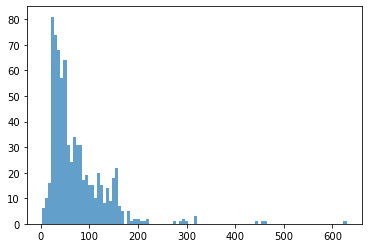

In [24]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.show()

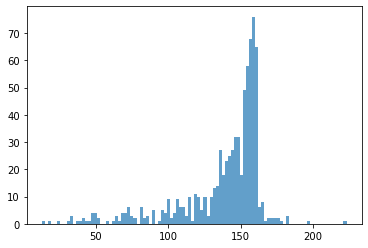

In [25]:
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

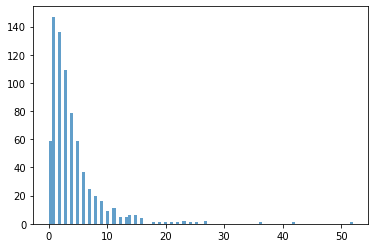

In [26]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.show()

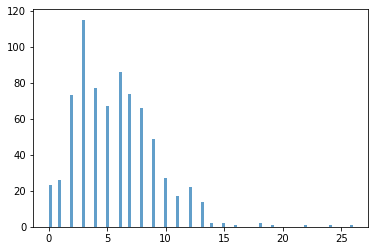

In [27]:
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

In [28]:
#Split the data into train and test
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.30,random_state=101)

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1045,)
(1045,)
(449,)
(449,)


In [31]:
#Build Classification Model
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
#Machine Learning algorithm
from sklearn.ensemble import RandomForestClassifier

In [33]:
#pipeline package to merge nlp and machine learning together and get the output
from sklearn.pipeline import Pipeline

In [34]:
classifier=Pipeline([('tfidg',TfidfVectorizer()),('classifier',RandomForestClassifier(n_estimators=100))])

In [35]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidg', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [36]:
#Predict gthe model using test dataset
y_pred=classifier.predict(x_test)

In [37]:
y_test,y_pred

(416      ham
 497      ham
 774     spam
 142      ham
 864     spam
         ... 
 1228    spam
 100      ham
 601      ham
 545      ham
 268      ham
 Name: label, Length: 449, dtype: object,
 array(['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham',
        'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham',
        'spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham',
        'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
        'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham',
        'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam',
        'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam',
        'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'h

In [38]:
#Evaluation-Using performance matrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       226
        spam       1.00      0.90      0.94       223

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [39]:
print(confusion_matrix(y_test,y_pred))

[[225   1]
 [ 23 200]]


In [40]:
print(accuracy_score(y_test,y_pred))

0.9465478841870824


In [41]:
#SVM

In [42]:
from sklearn.svm import SVC

In [43]:
classifier1=Pipeline([('tfidf',TfidfVectorizer()),('svm',SVC(C=100,gamma='auto'))])

In [44]:
classifier1.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svm', SVC(C=100, gamma='auto'))])

In [45]:
y_pred_svm_test=classifier1.predict(x_test)

In [46]:
print(accuracy_score(y_test,y_pred_svm_test))

0.9220489977728286


In [47]:
#Checking Model Performance

In [48]:
text1=["Hello,hope you are doing well!"]

In [49]:
text2=["Hi,you are learning Natural Language Processing"]

In [53]:
text3=["Congratulations!!! You won a lottery of $400000000 .To claim please contact @1111111"]

In [51]:
text4=["Hope you are doing well and learning new things"]

In [54]:
print(classifier.predict(text1))
print(classifier.predict(text2))
print(classifier.predict(text3))
print(classifier.predict(text4))

['ham']
['ham']
['spam']
['ham']


In [55]:
print(classifier1.predict(text1))
print(classifier1.predict(text2))
print(classifier1.predict(text3))
print(classifier1.predict(text4))

['ham']
['ham']
['spam']
['ham']
